<a href="https://colab.research.google.com/github/Mineth03/Dementia-Prediction-System-With-Comprehensive-Features/blob/Advanced_Dementia_Prediction/Advanced_Risk_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('DementiaDataset_Modified.csv')

# Filter out non-dementia patients (CDRGLOB == 0)
df_dementia = df[df['CDRGLOB'] != 0]

# Save the filtered dementia patient records to a new file
df_dementia.to_csv('dementia_patients.csv', index=False)

print("Dementia patient records have been saved to 'dementia_patients.csv'.")

<ipython-input-1-8b28103a7f34>:3: DtypeWarning: Columns (31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,269,333,452,483,491,516,552,616,671,676,677,678,679,687,820,821,822,839) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DementiaDataset_Modified.csv')


Dementia patient records have been saved to 'dementia_patients.csv'.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
data = pd.read_csv('dementia_patients.csv')

# Step 2: Inspect the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()


Dataset Head:
   NACCAGE  SEX  NACCBMI  EDUC  MARISTAT  NACCLIVS  INDEPEND  RESIDENC  \
0       70    1     32.4    16         1         4         1         1   
1       71    1     30.7    16         1         2         1         1   
2       63    2    888.8    16         1         2         2         1   
3       81    2     22.1     7         3         1         1         1   
4       86    1     28.9    20         1         2         1         1   

   NACCFAM  NACCMOM  ...  NACCFTD  NACCACSF  NACCPCSF  NACCTCSF  NACCMDSS  \
0        1        0  ...        0         0         0         0         3   
1        1        0  ...        0         0         0         0         3   
2       -4       -4  ...        0         0         0         0         3   
3        1        0  ...        0         0         0         0         3   
4        0        0  ...        0         0         0         0         3   

   CDRGLOB  CDRSUM  DEMENTED  NACCUDSD  NACCETPR  
0      0.5     0.5         

In [ ]:
# Step 3: Preprocess the data
# Assuming the target variable is named 'dementia_type'
# Encode categorical target if necessary
# if data['dementia_type'].dtype == 'object':
#     le = LabelEncoder()
#     data['dementia_type'] = le.fit_transform(data['dementia_type'])

# Separate features and target
target = 'CDRSUM'
X = data.drop(columns=[target])
y = data[target]

# Handle categorical features if any
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Calculate feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Step 6: Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Save the results to a CSV file
# feature_importance.to_csv('feature_importance.csv', index=False)

# print("Feature importance calculated and saved to 'feature_importance.csv'.")


In [1]:
import pandas as pd

# Step 1: Read the CSV file
file_path = "dementia_patients.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Define the categorization logic for NACCETPR
def categorize_naccetpr(value):
    if value in [1, 2, 3, 4, 5, 6, 7, 8, 13]:
        return 2  # High Risk
    elif value in [9, 10, 11, 12, 14, 15, 16, 17, 18]:
        return 1  # Moderate Risk
    elif value in [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]:
        return 0 # Low Risk
    elif value in [88, 99]:
        return -1  # Not Applicable/Missing
    else:
        return None  # Handle unexpected values

# Step 3: Apply the categorization function to the NACCETPR column
df['Risk_Category'] = df['NACCETPR'].apply(categorize_naccetpr)

# Step 4: Handle missing or Not Applicable data
# Option 1: Drop rows with Not Applicable/Missing
df_cleaned = df[df['Risk_Category'] != -1].copy()

# Option 2: Replace missing categories with the most frequent or median category
# df['Risk_Category'].fillna(df['Risk_Category'].mode()[0], inplace=True)

# Step 5: Verify the distribution of the categories
print(df_cleaned['Risk_Category'].value_counts())

# Step 6: Save the processed dataset (optional)
output_path = "test_T_typedataset.csv"  # Replace with desired output file path
df_cleaned.to_csv(output_path, index=False)

Risk_Category
2    80013
0     6478
1     2096
Name: count, dtype: int64


In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['NACCETPR', 'Risk_Category'])  # Drop the target and unrelated columns
y = df_cleaned['Risk_Category']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Match features with their importance
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))

      Feature  Importance
366  COGOTHIF    0.090442
285  NACCALZP    0.089934
340    OTHCOG    0.063564
341  OTHCOGIF    0.045006
284  NACCALZD    0.044939
365    COGOTH    0.042411
360  DYSILLIF    0.022664
265  IMPNOMCI    0.022529
405  NACCUDSD    0.018350
378  NACCIDEM    0.012160


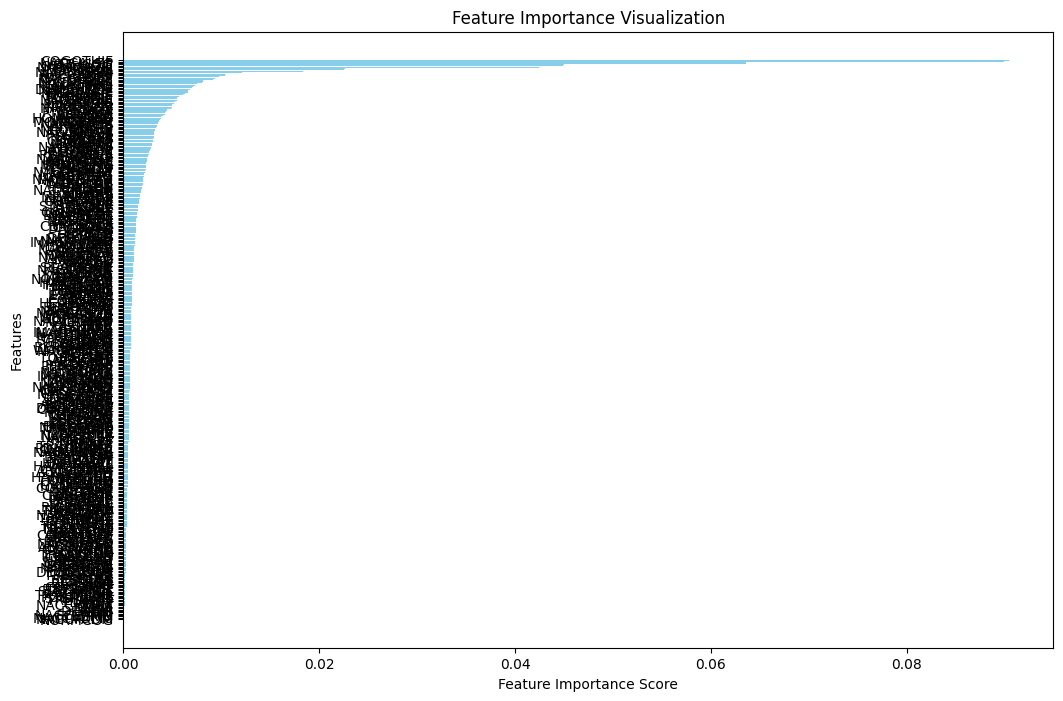

In [3]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Visualization')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
plt.show()

In [5]:
# Extract feature importances and feature names
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]  # Sort indices in descending order

# Print feature importances high to low
print("Feature Importance (High to Low):")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances [idx]:.7f}")


Feature Importance (High to Low):
COGOTHIF: 0.0904418
NACCALZP: 0.0899336
OTHCOG: 0.0635642
OTHCOGIF: 0.0450056
NACCALZD: 0.0449386
COGOTH: 0.0424114
DYSILLIF: 0.0226638
IMPNOMCI: 0.0225287
NACCUDSD: 0.0183501
NACCIDEM: 0.0121597
CVDIF: 0.0103846
DEP: 0.0103351
NACCBVFT: 0.0097787
NACCLBDP: 0.0093720
DYSILL: 0.0091742
CDRSUM: 0.0081094
NACCLBDS: 0.0079758
NACCTMCI: 0.0074862
CVD: 0.0073209
AMNDEM: 0.0071518
DEMENTED: 0.0069703
NACCLBDE: 0.0068032
NACCMCIL: 0.0066304
OTHPSYIF: 0.0066243
NACCAGE: 0.0063261
POSSADIF: 0.0060797
PRIONIF: 0.0056971
HYCEPHIF: 0.0054964
NACCMCIA: 0.0054427
PRION: 0.0054409
VASCPS: 0.0052972
PROBADIF: 0.0051156
PROBAD: 0.0050041
NACCGDS: 0.0049349
NACCMCIV: 0.0049237
MEDSIF: 0.0048160
PCA: 0.0044437
FTLDSUBT: 0.0043453
COURSE: 0.0042986
INFWMH: 0.0042367
EDUC: 0.0040637
HOMEHOBB: 0.0038328
POSSAD: 0.0038146
NACCBMI: 0.0036938
MOMOPARK: 0.0036075
NAMNDEM: 0.0035108
HRATE: 0.0035024
ANXIETIF: 0.0034804
BEDEP: 0.0034738
NACCMCIE: 0.0033633
COMMUN: 0.0032664
NACCCO

In [12]:
# Specify the feature you're interested in
target_feature = "OTHCOG"  # Replace with your feature of interest

# Retrieve the importance of the specific feature
if target_feature in feature_names:
    feature_idx = list(feature_names).index(target_feature)
    importance_value = feature_importances[feature_idx]
    print(f"Importance of {target_feature}: {importance_value:.7f}")
else:
    print(f"{target_feature} not found in the dataset.")

Importance of OTHCOG: 0.0635642


In [11]:
# Specify the feature you're interested in
target_feature = "OTHCOGIF"  # Replace with your feature of interest

# Retrieve the importance of the specific feature
if target_feature in feature_names:
    feature_idx = list(feature_names).index(target_feature)
    importance_value = feature_importances[feature_idx]
    print(f"Importance of {target_feature}: {importance_value:.7f}")
else:
    print(f"{target_feature} not found in the dataset.")

Importance of OTHCOGIF: 0.0450056
